In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
test = requests.get(query_url + "London").json()
test['main']

{'temp': 21.81,
 'feels_like': 21.38,
 'temp_min': 20.59,
 'temp_max': 23.33,
 'pressure': 1019,
 'humidity': 51}

In [3]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [24.22, 21.81, 22, 21.94, 29.99, 26.37, 25.68, 19.37, 33.75, 24.96]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,24.22
1,London,51.5085,21.81
2,Oslo,59.9127,22.00
3,Beijing,39.9075,21.94
4,Mumbai,19.0144,29.99
5,Manila,14.6042,26.37
6,New York,40.7143,25.68
7,Seattle,47.6062,19.37
8,Dallas,32.7668,33.75
9,Taipei,25.0478,24.96


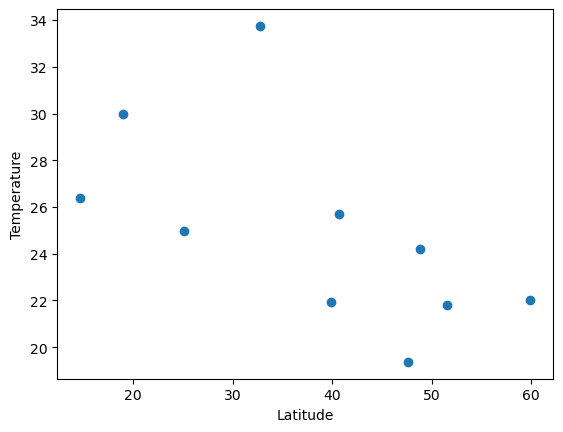

In [5]:
# Create a Scatter Plot for temperature vs latitude
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.show()

In [6]:
# Perform a linear regression on temperature vs. latitude
slope, intercept, rval, pval, err = stats.linregress(weather_data["lat"], weather_data["temp"])

# Get regression values
regress_values = weather_data["lat"] * slope + intercept
regress_values

0    23.109835
1    22.645511
2    21.175784
3    24.674294
4    28.328079
5    29.099335
6    24.533200
7    23.327945
8    25.923059
9    27.272958
Name: lat, dtype: float64

In [7]:
# Create line equation string
eq = f"y = {slope:.2f}x + {intercept:.2f}"
print(eq)

y = -0.17x + 31.65


The r-value is -0.6074734504945215


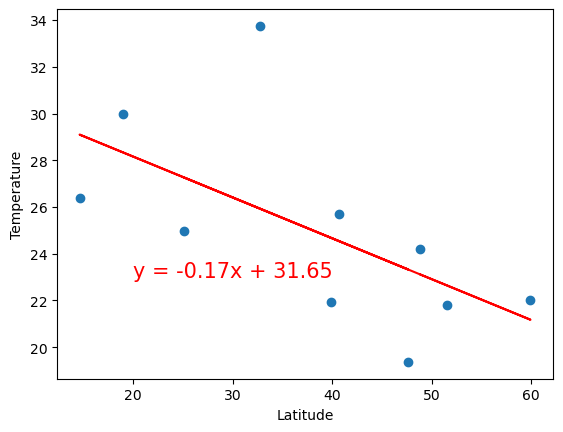

In [8]:
# Create Plot
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")
plt.plot(weather_data["lat"], regress_values, "r-")

# Label plot and annotate the line equation
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.annotate(eq, (20.0, 23.0), fontsize=15, color="red")

# Print r value
print(f"The r-value is {rval}")

# Show plot
plt.show()

In [11]:
# Calculate the temperature for Florence at 43.77 degrees
flor_temp = slope * 43.77 + intercept
print(f"The predicted temperature for Florence will be {flor_temp:.2f}")

The predicted temperature for Florence will be 24.00


In [10]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
print(f"The actual temperature of Florance is {response['main']['temp']}")

The actual temperature of Florance is 21.72
